# Textmining

---

Group name: C

---

Use your data from task 1 (web scraping) to perform textmining (Sentiment-Analyse ist nicht relevant).

*Use all of the the example code from our lectures*

Save the processed dataframe as CSV (call it `textmining-clean.csv`) in the folder `data/processed`

In [14]:
#WARNING SUPPRESSION

# Unterdrücken von Warnungen
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [15]:
#DATA IMPORT

import pandas as pd

# Artikeldaten aus webscraping importieren (csv einlesen)
df = pd.read_csv("webscraping.csv")

df.head(3)

,Unnamed: 0,Titel,Artikeltext
0,0,Nuclear fusion: How long until this breakthrou...,Here’s what you need to know about this new fo...


In [16]:
#CORRECTIONS

# Artikeltext in Kleinbuchstaben
df['Artikeltext'] = df['Artikeltext'].str.lower()

df.head(3)

,Unnamed: 0,Titel,Artikeltext
0,0,Nuclear fusion: How long until this breakthrou...,here’s what you need to know about this new fo...


In [17]:
#DATA PREPARATION

from nltk.tokenize import RegexpTokenizer

# Tokenizer für Wörter und Ergebnis der Tokenisierung in df speichern
regexp = RegexpTokenizer('\w+')

df['text_token']=df['Artikeltext'].apply(regexp.tokenize)

#STOPWORDS

# Stoppwörter festlegen
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

# Liste mit englischen stopwords erstellen
stopwords = nltk.corpus.stopwords.words("english")

# Liste mit benutzerdefinierten stopwords erstellen
my_stopwords = ['https', '\n']

# Stopword Liste um eigene stopwords erweitern
stopwords.extend(my_stopwords)

# Stopwords entfernen und neues Ergebnis speichern (df)
df['text_token_s'] = df['text_token'].apply(lambda x: [i for i in x if i not in stopwords])



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcwil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
#TRANSFORM DATA

df['text_si'] = df['text_token_s'].apply(lambda x: ' '.join([i for i in x if len(i)>2]))

#LEMMATIZATION (Umwandeln von Worten in ihre Grundform)

nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

# Spalte "text_si" lemmatisieren und Ergebnis speichern
df['text_sil'] = df['text_si'].apply(wordnet_lem.lemmatize)

# Beide Versionen vergleichen
check_difference = (df['text_sil'] == df['text_si'])

# True und False Werte zählen
check_difference.value_counts()

# Daten als csv abspeichern
df.to_csv("textmining-clean.csv", index=None)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mcwil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mcwil\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [19]:
#DATA VISUALIZATION

#WORD CLOUD

# "text_sil" zusammenfügen
all_words = ' '.join([i for i in df['text_sil']])

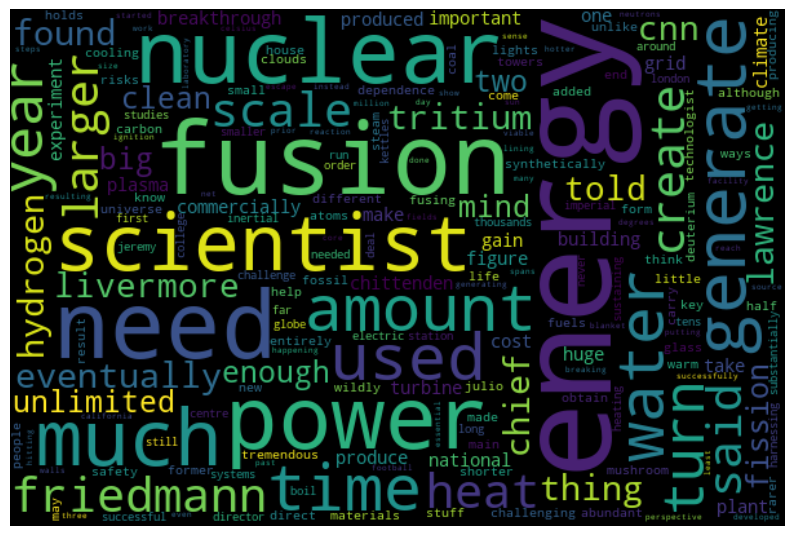

In [20]:
# Word cloud designen und erstellen

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show;

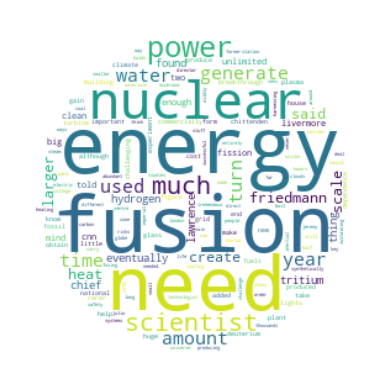

In [21]:
#WORDCLOUD DIFFERENT STYLE

# Andere Word Cloud in rundem Stil mit NumPy

import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show;

In [22]:
#FREQUENCY DISTRIBUTIONS

#Tokenisierung
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words_tokens = nltk.word_tokenize(all_words)

words_tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcwil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['need',
 'know',
 'new',
 'form',
 'nuclear',
 'energy',
 'could',
 'eventually',
 'turn',
 'lights',
 'help',
 'end',
 'dependence',
 'fossil',
 'fuels',
 'deuterium',
 'glass',
 'water',
 'little',
 'tritium',
 'added',
 'could',
 'power',
 'house',
 'year',
 'tritium',
 'rarer',
 'challenging',
 'obtain',
 'although',
 'synthetically',
 'made',
 'unlike',
 'coal',
 'need',
 'small',
 'amount',
 'hydrogen',
 'abundant',
 'thing',
 'found',
 'universe',
 'julio',
 'friedmann',
 'chief',
 'scientist',
 'carbon',
 'direct',
 'former',
 'chief',
 'energy',
 'technologist',
 'lawrence',
 'livermore',
 'told',
 'cnn',
 'hydrogen',
 'found',
 'water',
 'stuff',
 'generates',
 'energy',
 'wildly',
 'unlimited',
 'clean',
 'people',
 'think',
 'nuclear',
 'energy',
 'cooling',
 'towers',
 'mushroom',
 'clouds',
 'may',
 'come',
 'mind',
 'fusion',
 'entirely',
 'different',
 'nuclear',
 'fusion',
 'carry',
 'safety',
 'risks',
 'materials',
 'used',
 'power',
 'much',
 'shorter',
 'half',
 '

In [23]:
# Häufigkeitsverteilung herstellen und anzeigen
fd = FreqDist(words_tokens)

fd

FreqDist({'energy': 19, 'fusion': 10, 'need': 8, 'nuclear': 8, 'power': 8, 'much': 6, 'scientists': 5, 'water': 4, 'used': 4, 'could': 3, ...})

In [24]:
#MOST COMMON WORDS

# Identifizieren und anzeigen der drei häufigsten Wörter

top_3 = fd.most_common(n=3)

fd.tabulate(3)

energy fusion   need 
    19     10      8 


In [27]:
#PLOT COMMON WORDS

# 10 häufigste Wörter identifizieren
top_10 = fd.most_common(10)

df_dist = pd.DataFrame({"value": dict(top_10)})

# Index zurücksetzen
df_dist.reset_index(inplace=True)

# Bar chart erstellen und anzeigen
import altair as alt

alt.Chart(df_dist).mark_bar().encode(
    x=alt.X("value"),
    y=alt.Y("index", sort="-x")
)

alt.Chart(...)

In [26]:
#SEARCH SPECIFIC WORDS

# Häufigkeit eines bestimmten Wortes anzeigen
fd["nuclear"]

8